Tutorial from: https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b

In [44]:
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso#Loading the dataset
from itertools import combinations 

In [3]:
df = pd.read_csv('data_cleaned.csv', index_col=0)
X = df.drop('price',1)   #Feature Matrix
y = df.price       #Target Variable
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,attic
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1180,0.0,1955,98178,47.5112,-122.257,1340,5650,0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,400.0,1951,98125,47.7210,-122.319,1690,7639,0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,0.0,1933,98028,47.7379,-122.233,2720,8062,0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,910.0,1965,98136,47.5208,-122.393,1360,5000,0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,0.0,1987,98074,47.6168,-122.045,1800,7503,0


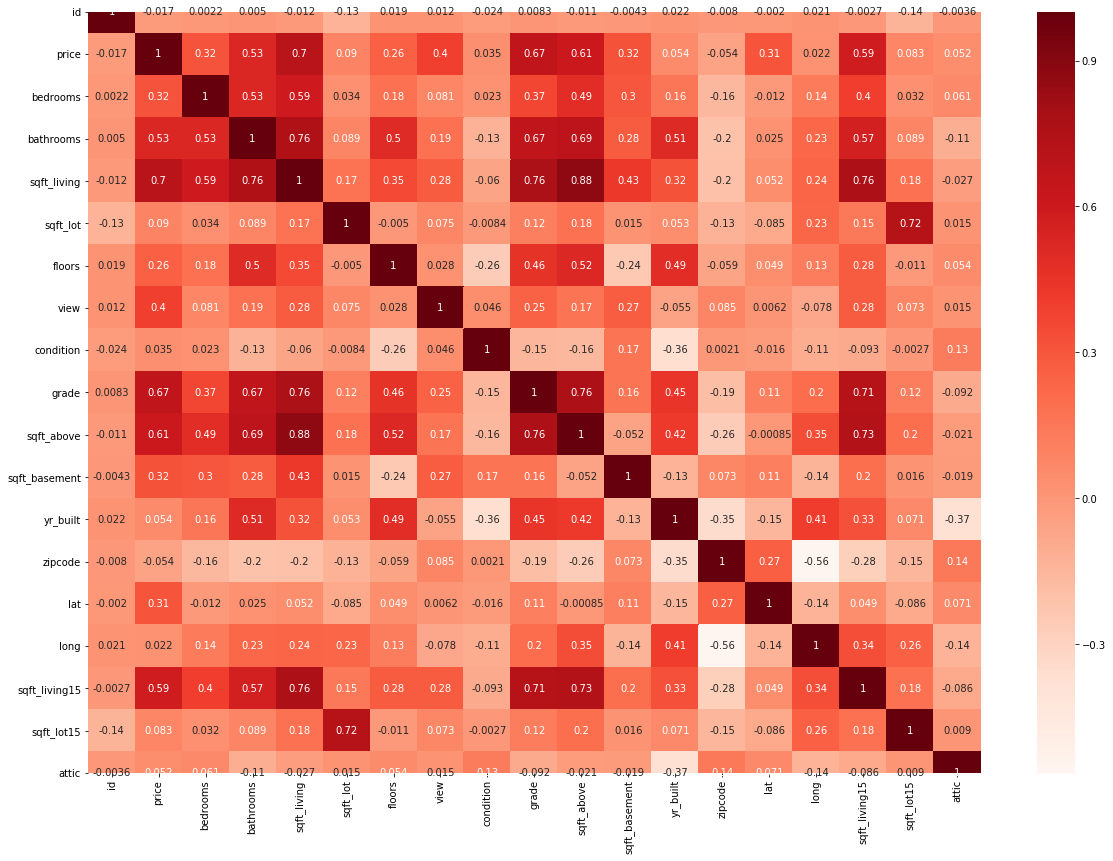

In [11]:
#Using Pearson Correlation
plt.figure(figsize=(20,14))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [65]:
#Correlation with output variable
cor_target = abs(cor.price)#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

price            1.000000
bathrooms        0.525063
sqft_living      0.701599
grade            0.668320
sqft_above       0.605719
sqft_living15    0.585329
Name: price, dtype: float64

In [67]:
# combs = list(combinations(relevant_features.index, 2))

# for f, c in combs:
    
print(df[['bathrooms', 'grade']].corr()[:1])

           bathrooms     grade
bathrooms        1.0  0.665308


#### Drop sqft_above